Wholesale customers là dataset phục vụ cho bài toán customer segmentation dựa vào một số thông tin và hành vi của khách hàng 
- Đọc dữ liệu
- Trực quan hóa dữ liệu
- Chuẩn hóa dữ liệu 
- Dùng elbow method để chọn ra số clusters thích hợp (có thể chọn số clusters $\pm1$ để so sánh sự khác biệt)
- Biểu diễn các cụm sang không gian 2 chiều và 3 chiều
- Chọn ra một số data samples theo từng cụm để phân tích các giá trị trong đó 

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem. 
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Clustered_Customer_Data.csv")

In [3]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [4]:
df.tail()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
8945,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,3
8946,8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,3
8947,8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,3
8948,8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


# Data Analysis

In [7]:
df.columns

Index(['Unnamed: 0', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Cluster'],
      dtype='object')

In [8]:
df.isnull().any()

Unnamed: 0                          False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
Cluster                             False
dtype: bool

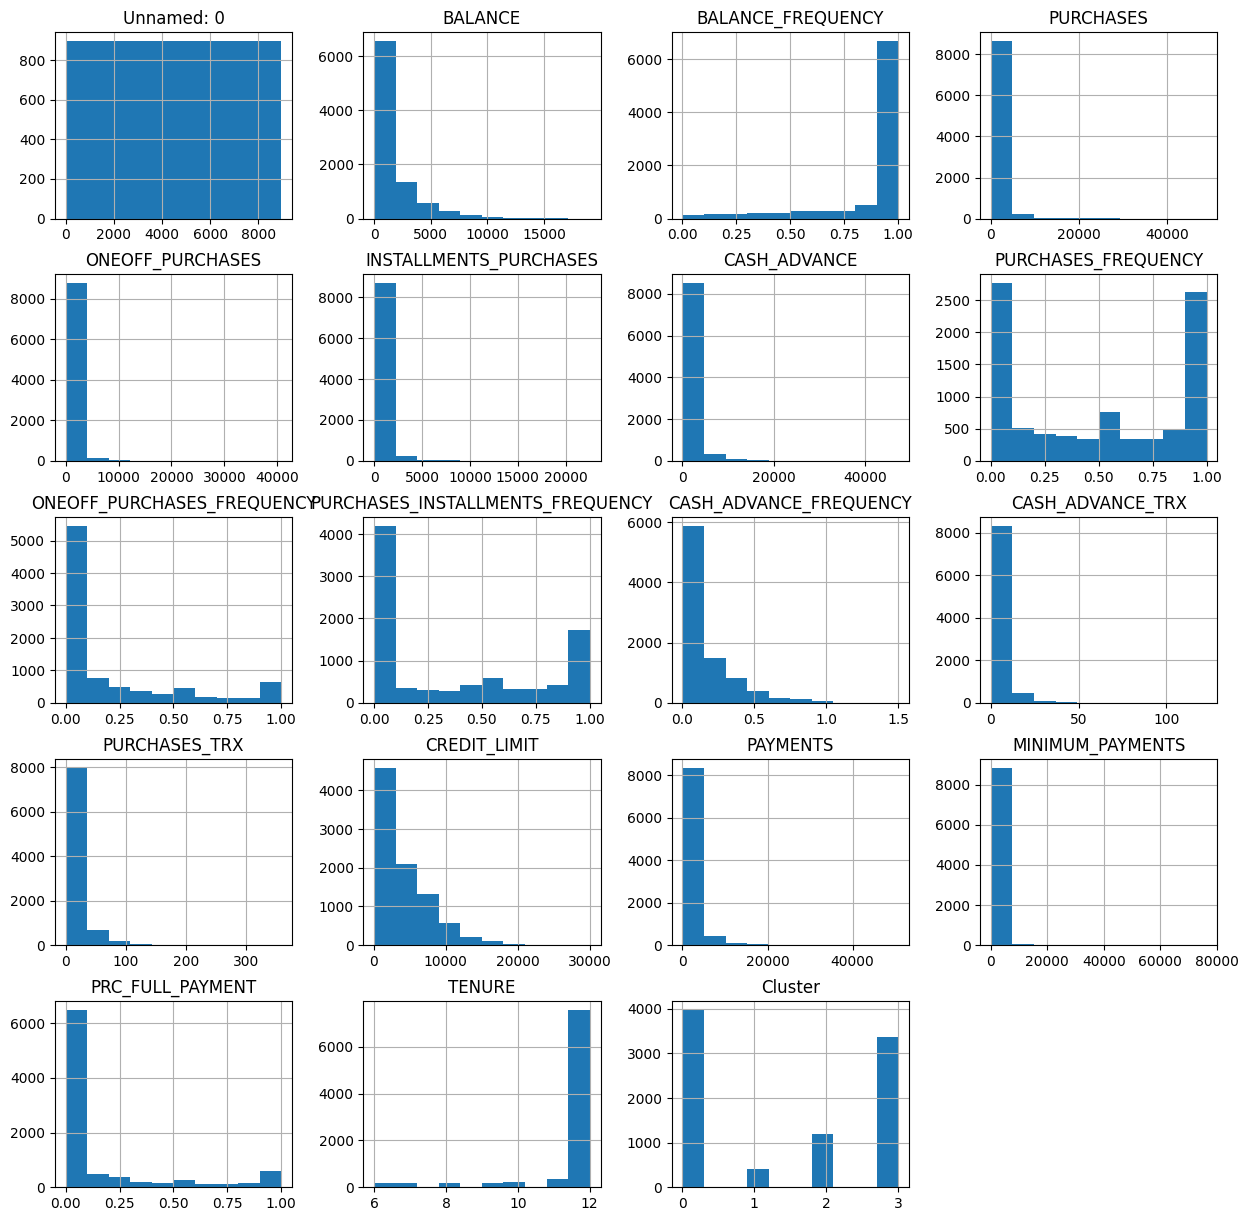

In [9]:
df.hist(figsize=(15, 15))
plt.show()

In [10]:
cat_cols = [col for col in df.columns if df[col].dtypes=="O"]

In [11]:
for col in cat_cols: #Với mỗi phần tử col có trong cat_cols
    sns.countplot(x=col, data=df) #ta vẽ hình dạng countplot cho từng col
    plt.show() #phải dùng nếu không thì chỉ vẽ hình cuối cùng trong list 

<Axes: xlabel='TENURE', ylabel='Count'>

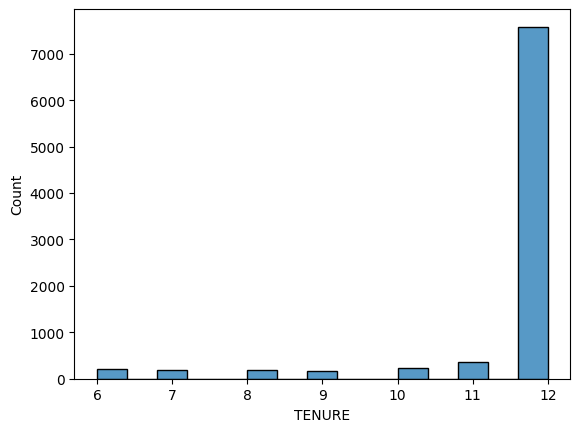

In [12]:
sns.histplot(data = df , x = 'TENURE')

<Axes: >

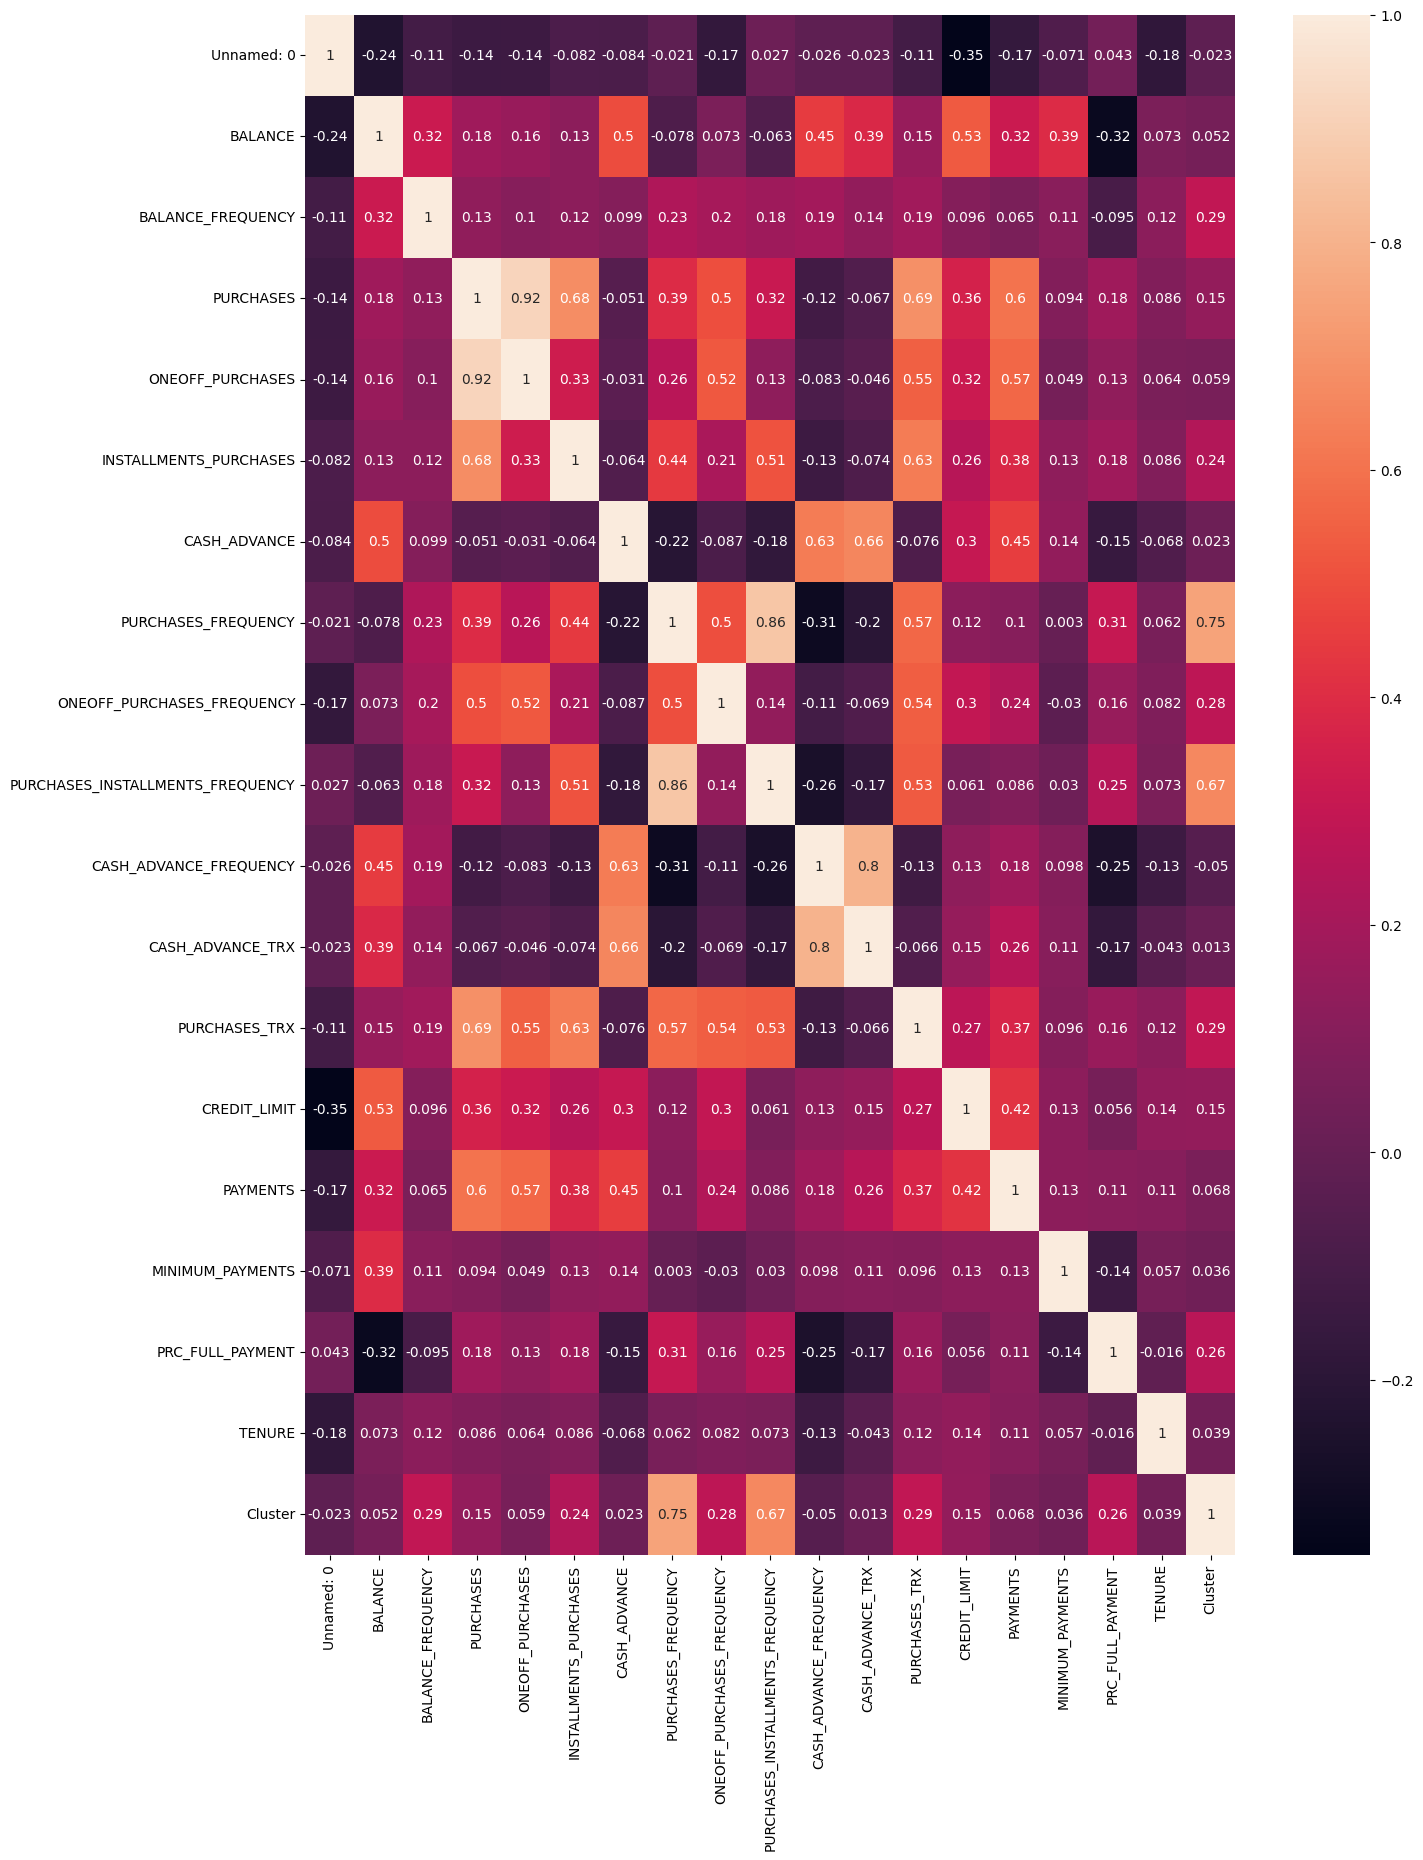

In [13]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

# Data Preprocessing

In [14]:
def processing_data(data):
  data.drop(columns= 'Unnamed: 0' , inplace= True)
  data.drop(columns= 'Cluster' , inplace= True)
  for i in data.columns:
    if not data[i].isnull().any():
      data[i] = data[i].fillna(data[i].median())
  return data

In [15]:
df_data = processing_data(df)
df_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Feature Engineering

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data.values)

# Model part

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

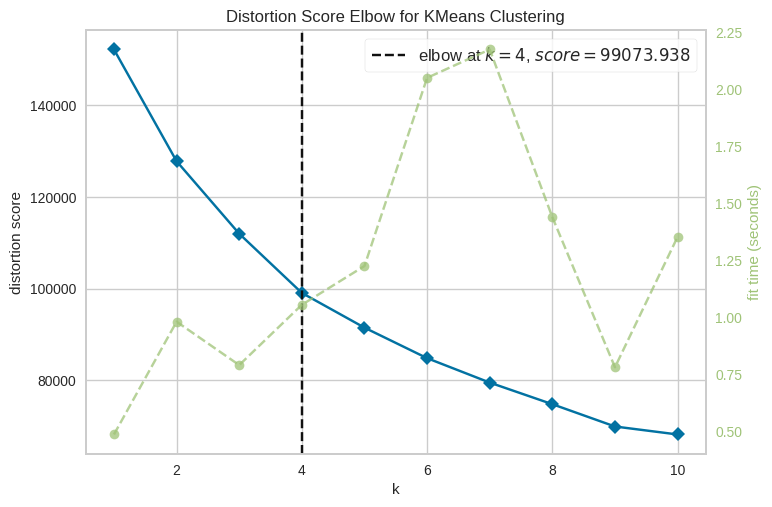

In [17]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
def elbow(data):
  elbow_method = KElbowVisualizer( KMeans( init='k-means++' , random_state= 42 ), k=(1,11))
  elbow_method.fit(data)
  elbow_method.show()

elbow(scaled_data)

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer
def Silhouette_Score(data):
  fig, ax = plt.subplots(2, 2, figsize=(15,8))
  for i in [2, 3, 4, 5]:
      km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
      q, mod = divmod(i, 2)
      visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
      visualizer.fit(data)

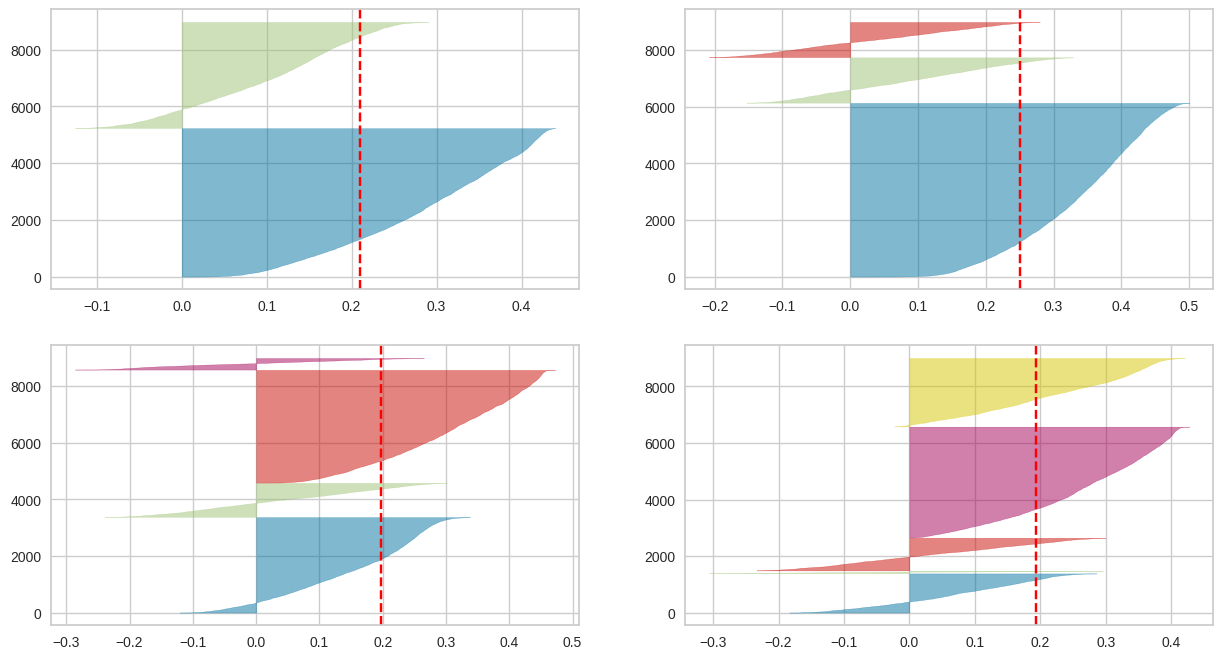

In [19]:
Silhouette_Score(scaled_data)

In [20]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
#để xuất ra label của tập training (scaled_data) ta dùng .labels_
kmeans_model.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [22]:
#để dự đoán ra label của tập testing (ta giả sử là scaled_data) ta dùng .predict
kmeans_model.predict(scaled_data)

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [23]:
#Để xuất ra các centroids ta có thể dùng .cluster_centers_
kmeans_model.cluster_centers_

array([[ 1.16146264,  0.34032506, -0.29046365, -0.20746781, -0.30570882,
         1.37785776, -0.64454468, -0.30711924, -0.55563023,  1.55907756,
         1.33983706, -0.36762478,  0.5993495 ,  0.44330141,  0.39884679,
        -0.4100761 , -0.12671273],
       [-0.36739601, -0.17766325, -0.23289783, -0.20440827, -0.17504749,
        -0.30951408, -0.06279583, -0.23499222, -0.04840139, -0.3342515 ,
        -0.29880399, -0.24358261, -0.33646655, -0.28440274, -0.13542909,
         0.00704478, -0.02820832],
       [ 0.31879808,  0.43995548,  1.5278713 ,  1.27968321,  1.26120698,
        -0.24713095,  1.14310532,  1.5597449 ,  0.9570433 , -0.35868698,
        -0.25104945,  1.68039449,  0.89153764,  0.83532923,  0.15533633,
         0.4946452 ,  0.30324596]])

# PCA & Kmeans

In [24]:
from sklearn.decomposition import PCA 
def visulize_PCA(data , scale_info = 0.8):
  pca = PCA(n_components= data.shape[1])
  pca.fit(data)
  info = pca.explained_variance_ratio_
  x = np.array(list(range(data.shape[1]))) + 1
  sum_info = info.cumsum()
  n = 0
  for i in range(data.shape[1]):
    if sum_info[i] >= scale_info :
      print('info : ',sum_info[i])
      plt.plot(x , sum_info , marker = 'o' , linestyle = '--')
      plt.plot( i + 1 , sum_info[i] , 'ro')
      plt.show()
      return i + 1
  return n

info :  0.807642209836704


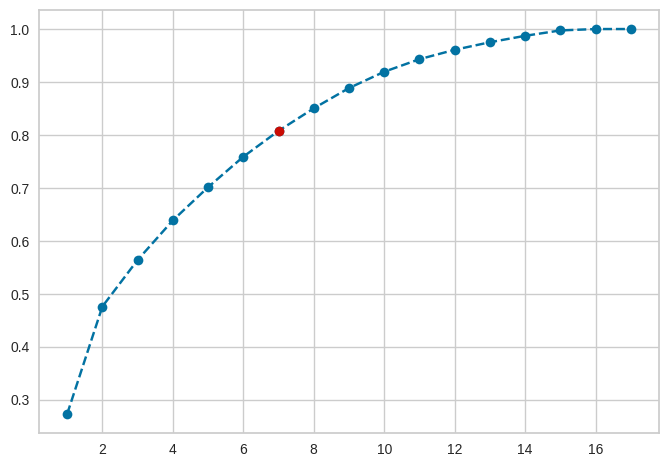

In [25]:
new_feature = visulize_PCA(scaled_data.copy() , 0.8)

In [26]:
from sklearn.decomposition import PCA #Khai báo thư viện PCA
pca = PCA(n_components=new_feature) #khai báo 
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

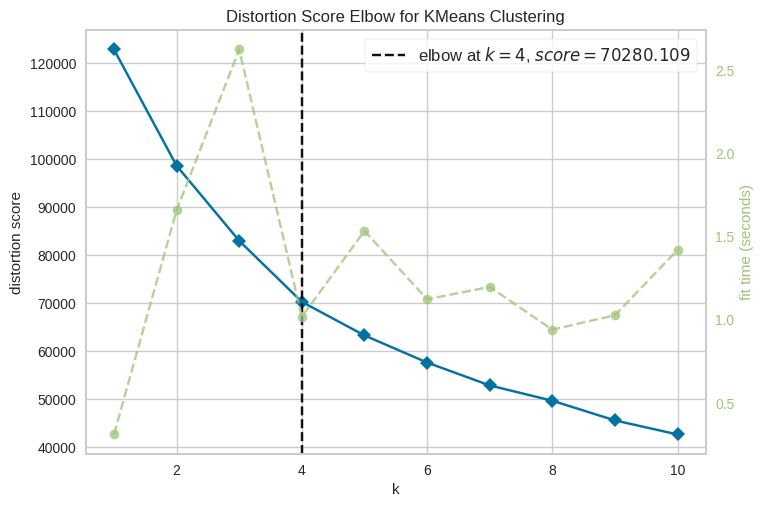

In [27]:
elbow(pca_data)

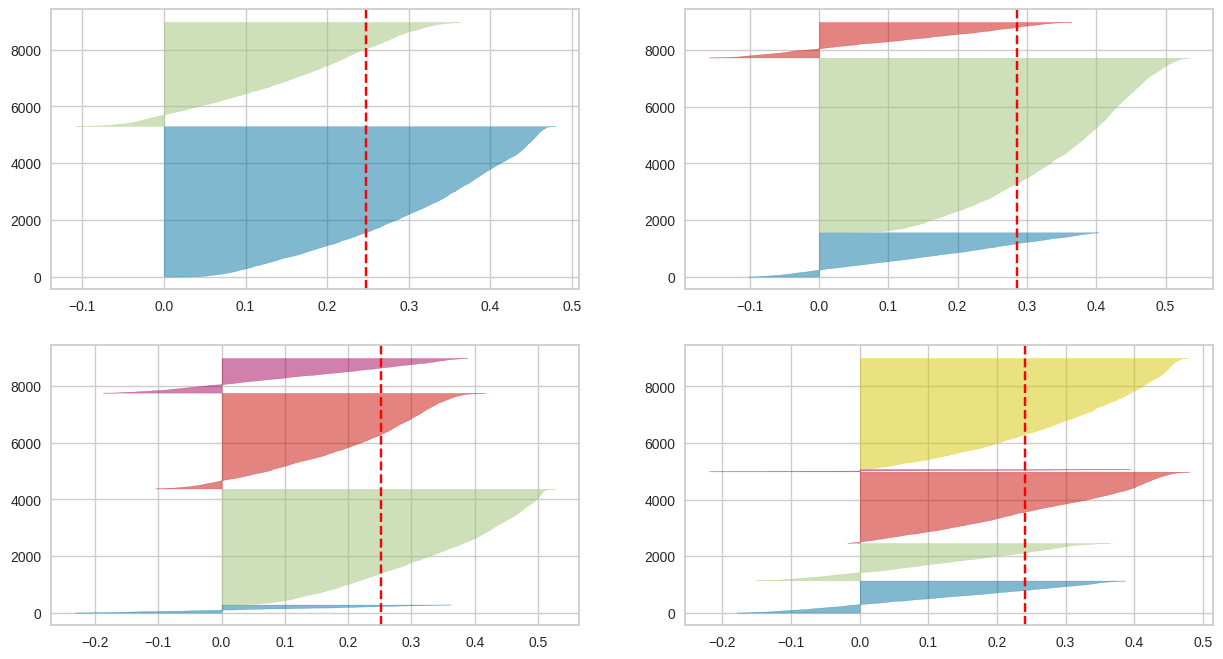

In [28]:
Silhouette_Score(pca_data)

#Scale MinMax

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler_M = MinMaxScaler((-2, 2))
scaler_M.fit(df_data)

MinMaxScaler(feature_range=(-2, 2))

In [30]:
scaleM_data = scaler_M.transform(df_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

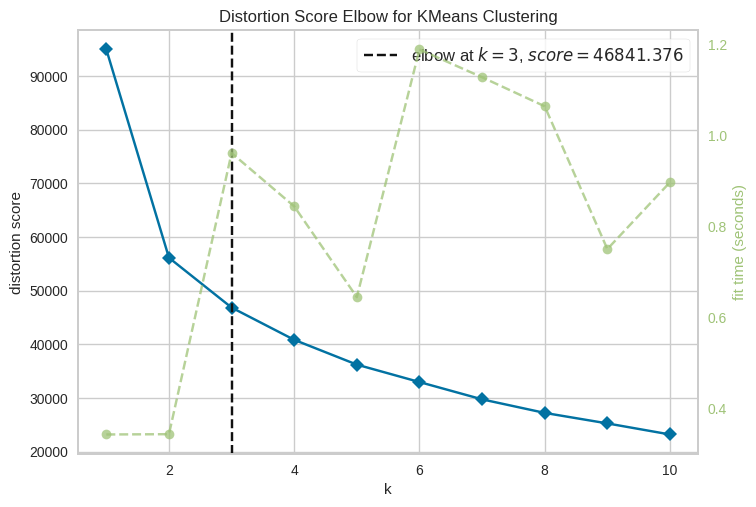

In [31]:
elbow(scaleM_data)

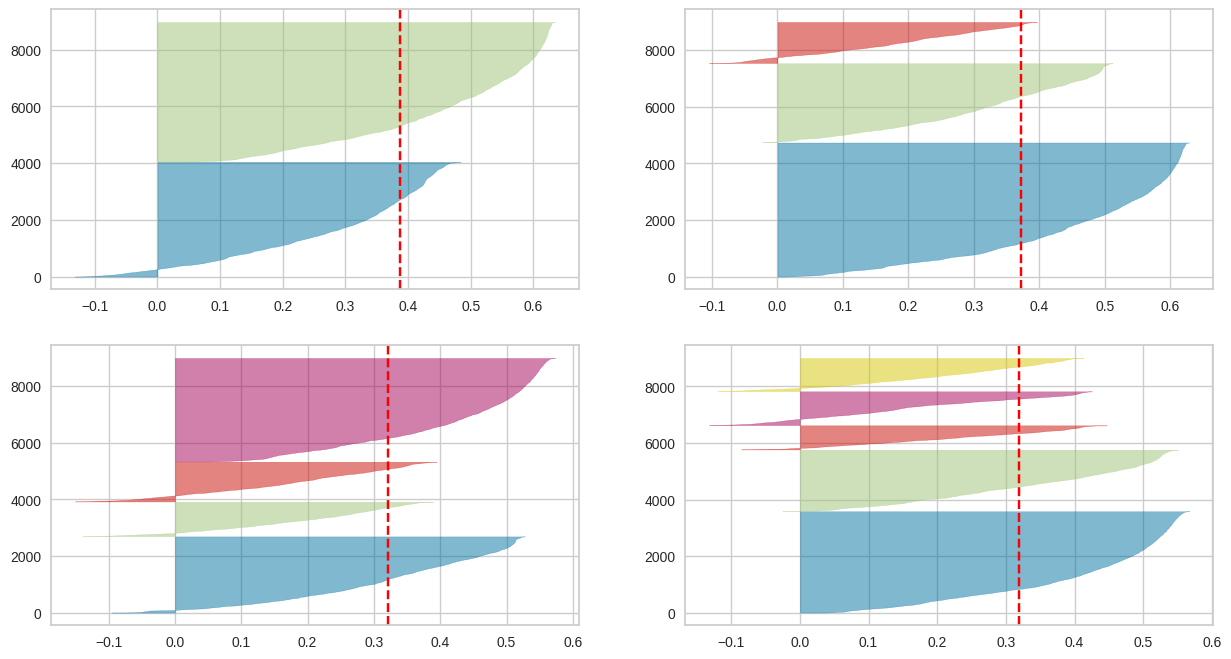

In [32]:
Silhouette_Score(scaleM_data)

In [40]:
pca.explained_variance_ratio_*100

array([27.29003722, 20.30199133,  8.7919794 ])

In [41]:
pca = PCA(n_components=3) #dùng pca 3 thành phần
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])

In [42]:
pca_df

,pca_1,pca_2,pca_3
0,-1.682220,-1.076451,0.488475
1,-1.138297,2.506476,0.601243
2,0.969685,-0.383520,0.102390
3,-0.873628,0.043165,1.460144
4,-1.599433,-0.688581,0.365057
...,...,...,...
8945,-0.359628,-2.016145,-0.995407
8946,-0.564368,-1.639123,-1.290308
8947,-0.926202,-1.810785,-0.474780
8948,-2.336551,-0.657966,0.974684


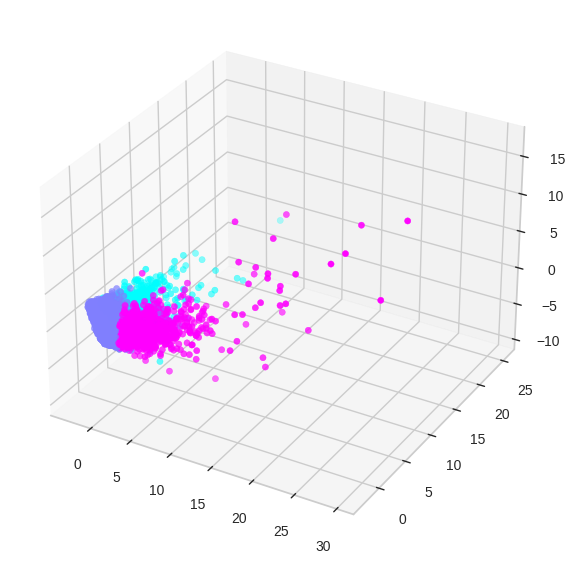

In [43]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

In [45]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_df = pd.DataFrame(pca.transform(scaled_data), columns=["pca1", "pca2"])

<function matplotlib.pyplot.show(close=None, block=None)>

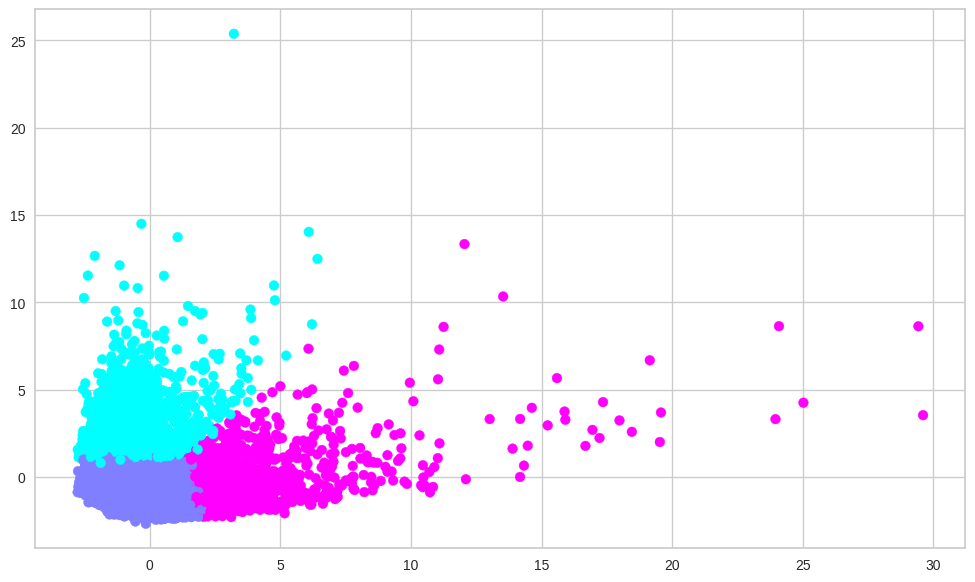

In [46]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df.pca1, pca_df.pca2, c=kmeans_model.labels_, cmap="cool")
plt.show

## Discussion & Conclusion

Việc không scaler data sẽ dẫn đến model tập trung vào các feature có giá trị lớn, việc sử dụng StandardScaler với data bị Outlier quá nặng sẽ ảnh hưởng xấu đến model, sử dụng MinmaxScaler để xử lý outlier và đưa các feature về cùng khoảng giá trị (-2 -> 2), sử dụng PCA để giảm chiều dữ liệu và giảm thông tin nhiễu, giữ lại lượng dữ liệu từ 80% trở lên sau khi giảm chiều (ở đây là 84%), sử dụng Elbow và Silhouette Score để chọn số cluster phù hợp, sử dụng MinmaxScaler và PCA để xử lý data, và số cluster được chọn là 3.